# Introduction

> **Will it rain tomorrow?**

That is the question we will try to answer in this project, practicing machine learning.

## Context

A vacation of a group of friends is about to start and they will arrive at the Melbourne Airport tomorrow. They rented a place near the airport and they want to go on foot to the rented place to save money in the beginning of their trip. But, if it is raining, they will have to go there using a mean of transportation, since they do not want to get wet. So, they want to know if it is going to rain tomorrow around the Melbourne Airport to know if they need to schedule a shuttle bus to take them to the rented place.

---

### Project Objective

> **Find if it will tomorrow around the Melbourne Airport.**

---

## Process

This project will be divided into 3 parts:

1. Initial Analysis of the Variables
2. **Baseline**
3. Development of the Machine Learning Model


# Part 02 | Baseline

The objective of the second part of this project is to develop a **baseline model**.

---

## Specific Objective

> **Develop a Logistic Regression Model as a baseline.**

---

## Premises

- To develop the baseline, the variables that store values measured at determined period of the day will not be considered.

## Setup

### Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

### Import the Dataset

In [2]:
# Import the dataset
df = pd.read_csv('exported_df/complete_dataset.csv')

# Check the result
df

,date,location,maxtemp,evaporation_final,sunshine_final,humidity9am_final,humidity3pm_final,pressure9am,pressure3pm,cloud9am,...,temp9am,temp3pm,precipitation3pm,precipitation9am,wind_speed9am_complete_final,wind_speed3pm_complete,wind_dir9am_complete_final_int,wind_dir3pm_complete_final_int,raintoday_int,raintomorrow_int
0,2009-01-01,MelbourneAirport,19.9,5.6,8.8,55.0,37.0,1005.1,1006.4,7.0,...,15.9,18.1,9,6.116945,33.0,43.0,12,10,0,1
1,2009-01-02,MelbourneAirport,17.8,7.2,12.9,50.0,43.0,1018.0,1019.3,6.0,...,12.5,15.8,12,9.775912,31.0,26.0,10,7,1,0
2,2009-01-03,MelbourneAirport,21.1,6.2,10.5,51.0,35.0,1020.8,1017.6,1.0,...,13.4,19.6,12,5.986239,13.0,19.0,4,8,0,0
3,2009-01-04,MelbourneAirport,29.2,6.4,12.5,67.0,23.0,1016.2,1012.8,5.0,...,16.0,28.2,11,9.501362,2.0,20.0,2,7,0,0
4,2009-01-05,MelbourneAirport,29.0,7.4,12.3,51.0,31.0,1011.9,1010.3,6.0,...,19.4,27.1,15,6.677340,9.0,20.0,10,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2017-06-20,MelbourneAirport,15.3,2.4,8.8,80.0,56.0,1028.2,1024.7,1.0,...,7.7,14.4,12,9.271984,24.0,30.0,0,0,0,0
2943,2017-06-21,MelbourneAirport,13.2,0.6,0.0,97.0,78.0,1029.1,1028.6,7.0,...,10.1,11.8,12,17.328204,9.0,13.0,12,8,0,0
2944,2017-06-22,MelbourneAirport,13.0,0.6,0.0,78.0,60.0,1028.6,1025.0,7.0,...,7.4,12.9,11,15.581160,17.0,19.0,0,0,0,0
2945,2017-06-23,MelbourneAirport,13.2,1.6,6.0,68.0,66.0,1018.7,1014.0,1.0,...,9.6,11.2,11,-0.692281,19.0,35.0,15,0,0,1


#### Create a Backup for the Raw Dataframe

In [3]:
# Backup
df_bkp = df.copy()

## Data Cleaning and Manipulation

In [4]:
# Check the dataset's metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            2947 non-null   object 
 1   location                        2947 non-null   object 
 2   maxtemp                         2947 non-null   float64
 3   evaporation_final               2947 non-null   float64
 4   sunshine_final                  2947 non-null   float64
 5   humidity9am_final               2947 non-null   float64
 6   humidity3pm_final               2947 non-null   float64
 7   pressure9am                     2947 non-null   float64
 8   pressure3pm                     2947 non-null   float64
 9   cloud9am                        2947 non-null   float64
 10  cloud3pm_final                  2947 non-null   float64
 11  temp9am                         2947 non-null   float64
 12  temp3pm                         29

In [5]:
# Check the statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
maxtemp,2947.0,20.519477,6.639235,8.400000,15.300000,19.200000,24.600000,46.800000
evaporation_final,2947.0,4.659654,3.321630,0.000000,2.200000,4.000000,6.400000,23.800000
sunshine_final,2947.0,6.419104,3.902773,0.000000,3.100000,6.600000,9.600000,13.900000
humidity9am_final,2947.0,69.969121,15.659936,11.000000,61.000000,71.000000,81.000000,100.000000
humidity3pm_final,2947.0,51.014252,17.793389,7.000000,40.000000,50.000000,62.000000,98.000000
pressure9am,2947.0,1018.037089,7.666151,989.700000,1013.100000,1018.200000,1023.200000,1039.300000
pressure3pm,2947.0,1016.236003,7.518912,988.200000,1011.300000,1016.600000,1021.400000,1036.000000
cloud9am,2947.0,5.238887,2.534074,0.000000,3.000000,7.000000,7.000000,8.000000
cloud3pm_final,2947.0,5.258229,2.361614,0.000000,3.000000,6.000000,7.000000,8.000000
temp9am,2947.0,14.142043,4.905283,3.300000,10.600000,13.500000,16.800000,35.400000


For this **baseline**, we use **raw values** of each variable. In Part 03, we will do a better data cleaning in the dataset.

Some observations to keep in mind in the next part:

- `maxtemp` (°C)
  - Minimum: 8.400000
  - Mean: 20.519477
  - Median: 19.200000
  - Maximum: 46.80 - **Too High**
- `evaporation_final` (mm)
- `sunshine_final` (hours)
- `humidity9am_final` (% | @ 9 AM)
- `humidity3pm_final` (% | @ 3 PM)
- `pressure9am` (hpa | @ 9 AM)
- `pressure3pm` (hpa | @ 3 PM)
- `cloud9am` (oktas | @ 9 AM)
- `cloud3pm_final` (oktas | @ 3 PM)
- `temp9am` (°C | @ 9 AM)
  - Minimum: 3.300000
  - Mean: 14.142043
  - Median: 13.500000
  - Maximum: 35.400000
- `temp3pm` (°C | @ 3 PM)
  - Minimum: 6.200000
  - Mean: 18.978487	
  - Median: 17.800000
  - Maximum: 46.100000 - **Too High**
- `precipitation9am` (mm | prior to 9 AM)  
- `precipitation3pm` (mm | prior to 3 PM)  
- `wind_gustspeed_complete_final` (km/h | in the 24 hours to midnight)
  - Minimum: 15.000000
  - Mean: 47.160502
  - Median: 44.000000
  - Maximum: 122.000000
- `wind_speed9am_complete_final` (km/h | 10 minutes prior to 9 AM)
  - Minimum: 0.000000
  - Mean: 20.486257
  - Median: 19.000000
  - Maximum: 67.000000
- `wind_speed3pm_complete` (km/h | 10 minutes prior to 3 PM)
  - Minimum: 0.000000
  - Mean: 23.230064	
  - Median: 22.000000
  - Maximum: 76.000000
- `raintoday_int`
  - Mean: 0.218188
  - Standard Deviation: 0.413086
- `raintomorrow_int`
  - Mean: 0.217170
  - Standard Deviation: 0.412389	

### Create Random Variable

In [6]:
# Add a columns with this random variable
np.random.seed(27)
df['random'] = np.random.randint(100, size=(df.shape[0]))

# Check the result
df

,date,location,maxtemp,evaporation_final,sunshine_final,humidity9am_final,humidity3pm_final,pressure9am,pressure3pm,cloud9am,...,temp3pm,precipitation3pm,precipitation9am,wind_speed9am_complete_final,wind_speed3pm_complete,wind_dir9am_complete_final_int,wind_dir3pm_complete_final_int,raintoday_int,raintomorrow_int,random
0,2009-01-01,MelbourneAirport,19.9,5.6,8.8,55.0,37.0,1005.1,1006.4,7.0,...,18.1,9,6.116945,33.0,43.0,12,10,0,1,19
1,2009-01-02,MelbourneAirport,17.8,7.2,12.9,50.0,43.0,1018.0,1019.3,6.0,...,15.8,12,9.775912,31.0,26.0,10,7,1,0,56
2,2009-01-03,MelbourneAirport,21.1,6.2,10.5,51.0,35.0,1020.8,1017.6,1.0,...,19.6,12,5.986239,13.0,19.0,4,8,0,0,72
3,2009-01-04,MelbourneAirport,29.2,6.4,12.5,67.0,23.0,1016.2,1012.8,5.0,...,28.2,11,9.501362,2.0,20.0,2,7,0,0,31
4,2009-01-05,MelbourneAirport,29.0,7.4,12.3,51.0,31.0,1011.9,1010.3,6.0,...,27.1,15,6.677340,9.0,20.0,10,7,0,0,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2017-06-20,MelbourneAirport,15.3,2.4,8.8,80.0,56.0,1028.2,1024.7,1.0,...,14.4,12,9.271984,24.0,30.0,0,0,0,0,34
2943,2017-06-21,MelbourneAirport,13.2,0.6,0.0,97.0,78.0,1029.1,1028.6,7.0,...,11.8,12,17.328204,9.0,13.0,12,8,0,0,13
2944,2017-06-22,MelbourneAirport,13.0,0.6,0.0,78.0,60.0,1028.6,1025.0,7.0,...,12.9,11,15.581160,17.0,19.0,0,0,0,0,82
2945,2017-06-23,MelbourneAirport,13.2,1.6,6.0,68.0,66.0,1018.7,1014.0,1.0,...,11.2,11,-0.692281,19.0,35.0,15,0,0,1,89


### Create Variables for the Model

#### Filter the Dataset

In [7]:
# Columns' names
df.columns

Index(['date', 'location', 'maxtemp', 'evaporation_final', 'sunshine_final',
       'humidity9am_final', 'humidity3pm_final', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm_final', 'temp9am', 'temp3pm', 'precipitation3pm',
       'precipitation9am', 'wind_speed9am_complete_final',
       'wind_speed3pm_complete', 'wind_dir9am_complete_final_int',
       'wind_dir3pm_complete_final_int', 'raintoday_int', 'raintomorrow_int',
       'random'],
      dtype='object')

In [9]:
# Necessary Variable
columns = ['raintoday_int', 'maxtemp', 'evaporation_final', 'sunshine_final', 'humidity9am_final', 'humidity3pm_final', 
           'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm_final', 'temp9am', 'temp3pm', 'precipitation9am',
           'precipitation3pm', 'wind_speed9am_complete_final', 'wind_speed3pm_complete', 'wind_dir9am_complete_final_int', 
           'wind_dir3pm_complete_final_int', 'random']

# Filter the dataset to create the variables for the model
X = df[columns]
y = df['raintomorrow_int']

## Holdout

We are going to use **80%** of the dataset to **train** the model and **20%** to **test** it. 

In [10]:
# Check shape of the dataset
print(f'Shape: {df.shape}')

# Length of each set
train_len = int(df.shape[0]*0.8)
train_len

Shape: (2947, 22)


2357

In [11]:
# Create sets for training and test
X_train = X.iloc[:train_len, :]
y_train = y[:train_len]

X_test = X.iloc[train_len:, :]
y_test = y[train_len:]

# Check if it is correct
print(f'Total columns of X: {X_train.shape[0] + X_test.shape[0]}')
print(f'Total columns of y: {y_train.shape[0] + y_test.shape[0]}')

Total columns of X: 2947
Total columns of y: 2947


## Standardization

To develop the model, the only thing we will do before training the model is the **standardization**, so all variables can be in the same scale and we can use them on the Logistic Regression.

In [12]:
# Instance the class
scaler = StandardScaler()

# Train the 'scaler'
scaler.fit(X_train)

StandardScaler()

In [13]:
# Standardize the variables
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

## Logistic Regression Model

For the baseline, the model will be set with the **default parameters**.

### Modeling

In [14]:
# Instance the model
logistic = LogisticRegression()

# Train the model
logistic.fit(X=X_train_std, y=y_train)

LogisticRegression()

### Cross Validation

#### Training Set

In [15]:
# Instance the class
cv = TimeSeriesSplit(n_splits=5)

In [16]:
# Function to calculate the metrics of the cross validation
def calculate_metrics_crossvalidation(X_train, y_train, model, cross_validation):
    
    accuracy_train = []
    accuracy_val = []
    precision_train = []
    precision_val = []   
    recall_train = []
    recall_val = []
    auc_train = []
    auc_val = []
    
    # Calculate metrics for training and validation sets
    for train_index, val_index in cross_validation.split(X=X_train):
        
        # Create sets for training and validation
        X_train_cv = pd.DataFrame(X_train).iloc[train_index]
        y_train_cv = y_train.iloc[train_index]
        
        X_val_cv = pd.DataFrame(X_train).iloc[val_index]
        y_val_cv = y_train.iloc[val_index]
        
        # Train the model
        model.fit(X_train_cv, y_train_cv)
        
        # Metrics
        
        ## Accuracy
        accuracy_train.append(model.score(X=X_train_cv, y=y_train_cv))
        accuracy_val.append(model.score(X=X_val_cv, y=y_val_cv))
        
        
        ## Precision
        precision_train.append(precision_score(y_true=y_train_cv, y_pred=model.predict(X_train_cv)))
        precision_val.append(precision_score(y_true=y_val_cv, y_pred=model.predict(X_val_cv)))
        
        ## Recall
        recall_train.append(recall_score(y_true=y_train_cv, y_pred=model.predict(X_train_cv)))
        recall_val.append(recall_score(y_true=y_val_cv, y_pred=model.predict(X_val_cv)))
        
        ## AUC
        auc_train.append(roc_auc_score(y_true=y_train_cv, y_score=model.predict_proba(X_train_cv)[:,1]))
        auc_val.append(roc_auc_score(y_true=y_val_cv, y_score=model.predict_proba(X_val_cv)[:,1]))
        
        
    # Calculate the mean for training and validation sets
    
    ## Accuracy
    accuracy_train_mean = np.mean(accuracy_train)
    accuracy_val_mean = np.mean(accuracy_val)
    
    accuracy_train_std = np.std(accuracy_train)
    accuracy_val_std = np.std(accuracy_val)
    
    ## Precision
    precision_train_mean = np.mean(precision_train)
    precision_val_mean = np.mean(precision_val)
    
    precision_train_std = np.std(precision_train)
    precision_val_std = np.std(precision_val)
    
    ## Recall
    recall_train_mean = np.mean(recall_train)
    recall_val_mean = np.mean(recall_val)
    
    recall_train_std = np.std(recall_train)
    recall_val_std = np.std(recall_val)
    
    ## AUC
    auc_train_mean = np.mean(auc_train)
    auc_val_mean = np.mean(auc_val)
    
    auc_train_std = np.std(auc_train)
    auc_val_std = np.std(auc_val)
    
    return ((accuracy_train_mean, accuracy_train_std), (accuracy_val_mean, accuracy_val_std)), ((precision_train_mean, precision_train_std), (precision_val_mean, precision_val_std)), ((recall_train_mean, recall_train_std), (recall_val_mean, recall_val_std)), ((auc_train_mean, auc_train_std), (auc_val_mean, auc_val_std))

In [19]:
# Create a dataframe for the metrics
df_metrics_train = pd.DataFrame(columns=['model', 
                                   'accuracy_train_mean', 'accuracy_train_std', 'accuracy_val_mean', 'accuracy_val_std',
                                   'precision_train_mean', 'precision_train_std', 'precision_val_mean', 'precision_val_std', 
                                   'recall_train_mean', 'recall_train_std', 'recall_val_mean', 'recall_val_std', 
                                   'auc_train_mean', 'auc_train_std', 'auc_val_mean', 'auc_val_std'])

# Add row
row_values = {'model': 'baseline',
              
              'accuracy_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                       model=logistic, cross_validation=cv)[0][0][0],
              'accuracy_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                      model=logistic, cross_validation=cv)[0][0][1],
              'accuracy_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                     model=logistic, cross_validation=cv)[0][1][0],
              'accuracy_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train,
                                                                    model=logistic, cross_validation=cv)[0][1][1],
              
              'precision_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                        model=logistic, cross_validation=cv)[1][0][0],
              'precision_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                       model=logistic, cross_validation=cv)[1][0][1],
              'precision_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                      model=logistic, cross_validation=cv)[1][1][0],
              'precision_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                     model=logistic, cross_validation=cv)[1][1][1],
              
              'recall_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                     model=logistic, cross_validation=cv)[2][0][0],
              'recall_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                    model=logistic, cross_validation=cv)[2][0][1],
              'recall_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                   model=logistic, cross_validation=cv)[2][1][0],
              'recall_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                  model=logistic, cross_validation=cv)[2][1][1],
              
              
              'auc_train_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                  model=logistic, cross_validation=cv)[3][0][0],
              'auc_train_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                 model=logistic, cross_validation=cv)[3][0][1],
              'auc_val_mean': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                                model=logistic, cross_validation=cv)[3][1][0],
              'auc_val_std': calculate_metrics_crossvalidation(X_train=X_train_std, y_train=y_train, 
                                                               model=logistic, cross_validation=cv)[3][1][1]}

df_metrics_train = df_metrics_train.append(row_values, ignore_index=True)

# Check the result
df_metrics_train.T

,0
model,baseline
accuracy_train_mean,0.842571
accuracy_train_std,0.00607044
accuracy_val_mean,0.831122
accuracy_val_std,0.0065338
precision_train_mean,0.704099
precision_train_std,0.0098926
precision_val_mean,0.678127
precision_val_std,0.0526494
recall_train_mean,0.478984


#### Training Test

In [20]:
# Create a dataframe for the metrics
df_metrics_test = pd.DataFrame(columns=['model', 'accuracy_test', 'precision_test', 'recall_test', 'auc_test']

# Add row
row_values = {'model': 'baseline',
              'accuracy_test': logistic.score(X=X_test_std, y=y_test),
              'precision_test': precision_score(y_true=y_test, y_pred=logistic.predict(X_test_std)),
              'recall_test': recall_score(y_true=y_test, y_pred=logistic.predict(X_test_std)),
              'auc_test': roc_auc_score(y_true=y_test, y_score=logistic.predict_proba(X_test_std)[:,1])}
                                
                                
                                
df_metrics_test = df_metrics_train.append(row_values, ignore_index=True)

# Check the result
df_metrics_test.T

SyntaxError: invalid syntax (<ipython-input-20-8d0655e24e8c>, line 5)

In [ ]:
precision_score

In [ ]:
auc

#### Export Dataframe

In [ ]:
# Export the dataframe for metrics
df_metrics_train.to_csv('exported_df/metrics_train.csv', index=False)

### Results

In [14]:
# Check the coefficients
pd.DataFrame(zip(X_train.columns, logistic.coef_.tolist()[0]), 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False).reset_index(drop=True)

,feature,coefficient
0,humidity3pm_final,1.149406
1,pressure9am,0.891816
2,wind_gustspeed_complete_final,0.747313
3,maxtemp,0.391745
4,cloud3pm_final,0.326503
5,temp3pm,0.307476
6,raintoday_int,0.137704
7,wind_gustdir_complete_final_int,0.132340
8,wind_dir3pm_complete_final_int,0.098461
9,precipitation3pm,0.070374


The features that had the most influence in the dataset are:
- humidity
- sunshine
- maximum temperature
- wind speed

In [50]:
# Check the intercept
logistic.intercept_

array([-1.90817966])

In [51]:
# Number maximum of iterations
logistic.n_iter_

array([45])

#### Accuracy

 $Accuracy = \frac{\text{number observations I've correctly predicted}}{\text{total number of observations}} = \frac{TN + TP}{TN + TP + FN + FP}$

In [25]:
# Training Set Accuracy
logistic.score(X=X_train_std, y=y_train)

0.8330536912751678

In [26]:
# Test Set Accuracy
logistic.score(X=X_test_std, y=y_test)

0.830820770519263

#### Precision

$Precision = \frac{TP}{TP + FP}$

High Precision $\to$  High Threshold

In [27]:
# Training Set Precision
precision_score(y_true=y_train, y_pred=logistic.predict(X_train_std))

0.708185053380783

In [28]:
# Test Set Precision
precision_score(y_true=y_test, y_pred=logistic.predict(X_test_std))

0.6842105263157895

#### Recall

$Recall = \frac{TP}{TP + FN}$

High Precision $\to$  Low Threshold

In [29]:
# Training Set Recall
recall_score(y_true=y_train, y_pred=logistic.predict(X_train_std))

0.3864077669902913

In [30]:
# Test Set Recall
recall_score(y_true=y_test, y_pred=logistic.predict(X_test_std))

0.40310077519379844

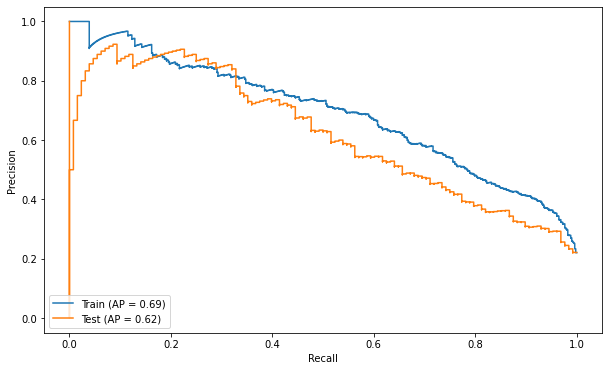

In [55]:
fig, ax = plt.subplots(figsize=(10,6))

plot_precision_recall_curve(estimator=logistic,X=X_train_std, y=y_train, ax=ax, name='Train')
plot_precision_recall_curve(estimator=logistic,X=X_test_std, y=y_test, ax=ax, name='Test');

#### ROC Curve

In [56]:
# Training Set Recall
roc_auc_score(y_true=y_train, y_score=logistic.predict_proba(X_train_std)[:, 1])

0.8738471798780488

In [57]:
# Test Set Recall
roc_auc_score(y_true=y_test, y_score=logistic.predict_proba(X_test_std)[:, 1])

0.8196191829004329

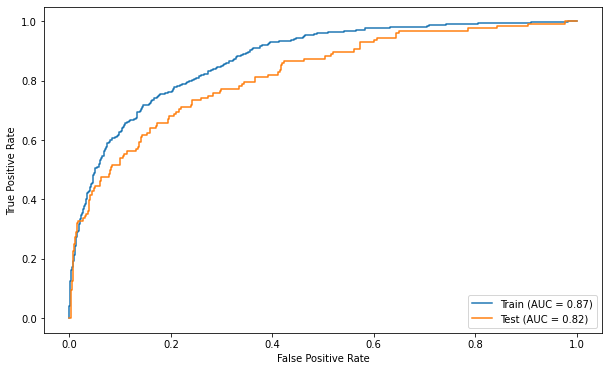

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

plot_roc_curve(estimator=logistic, X=X_train_std, y=y_train, ax=ax, name='Train')
plot_roc_curve(estimator=logistic, X=X_test_std, y=y_test, ax=ax, name='Test');

## Decision Tree

In [52]:
# Instance the model
tree_baseline = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
tree_baseline.fit(X=X_train, y=y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

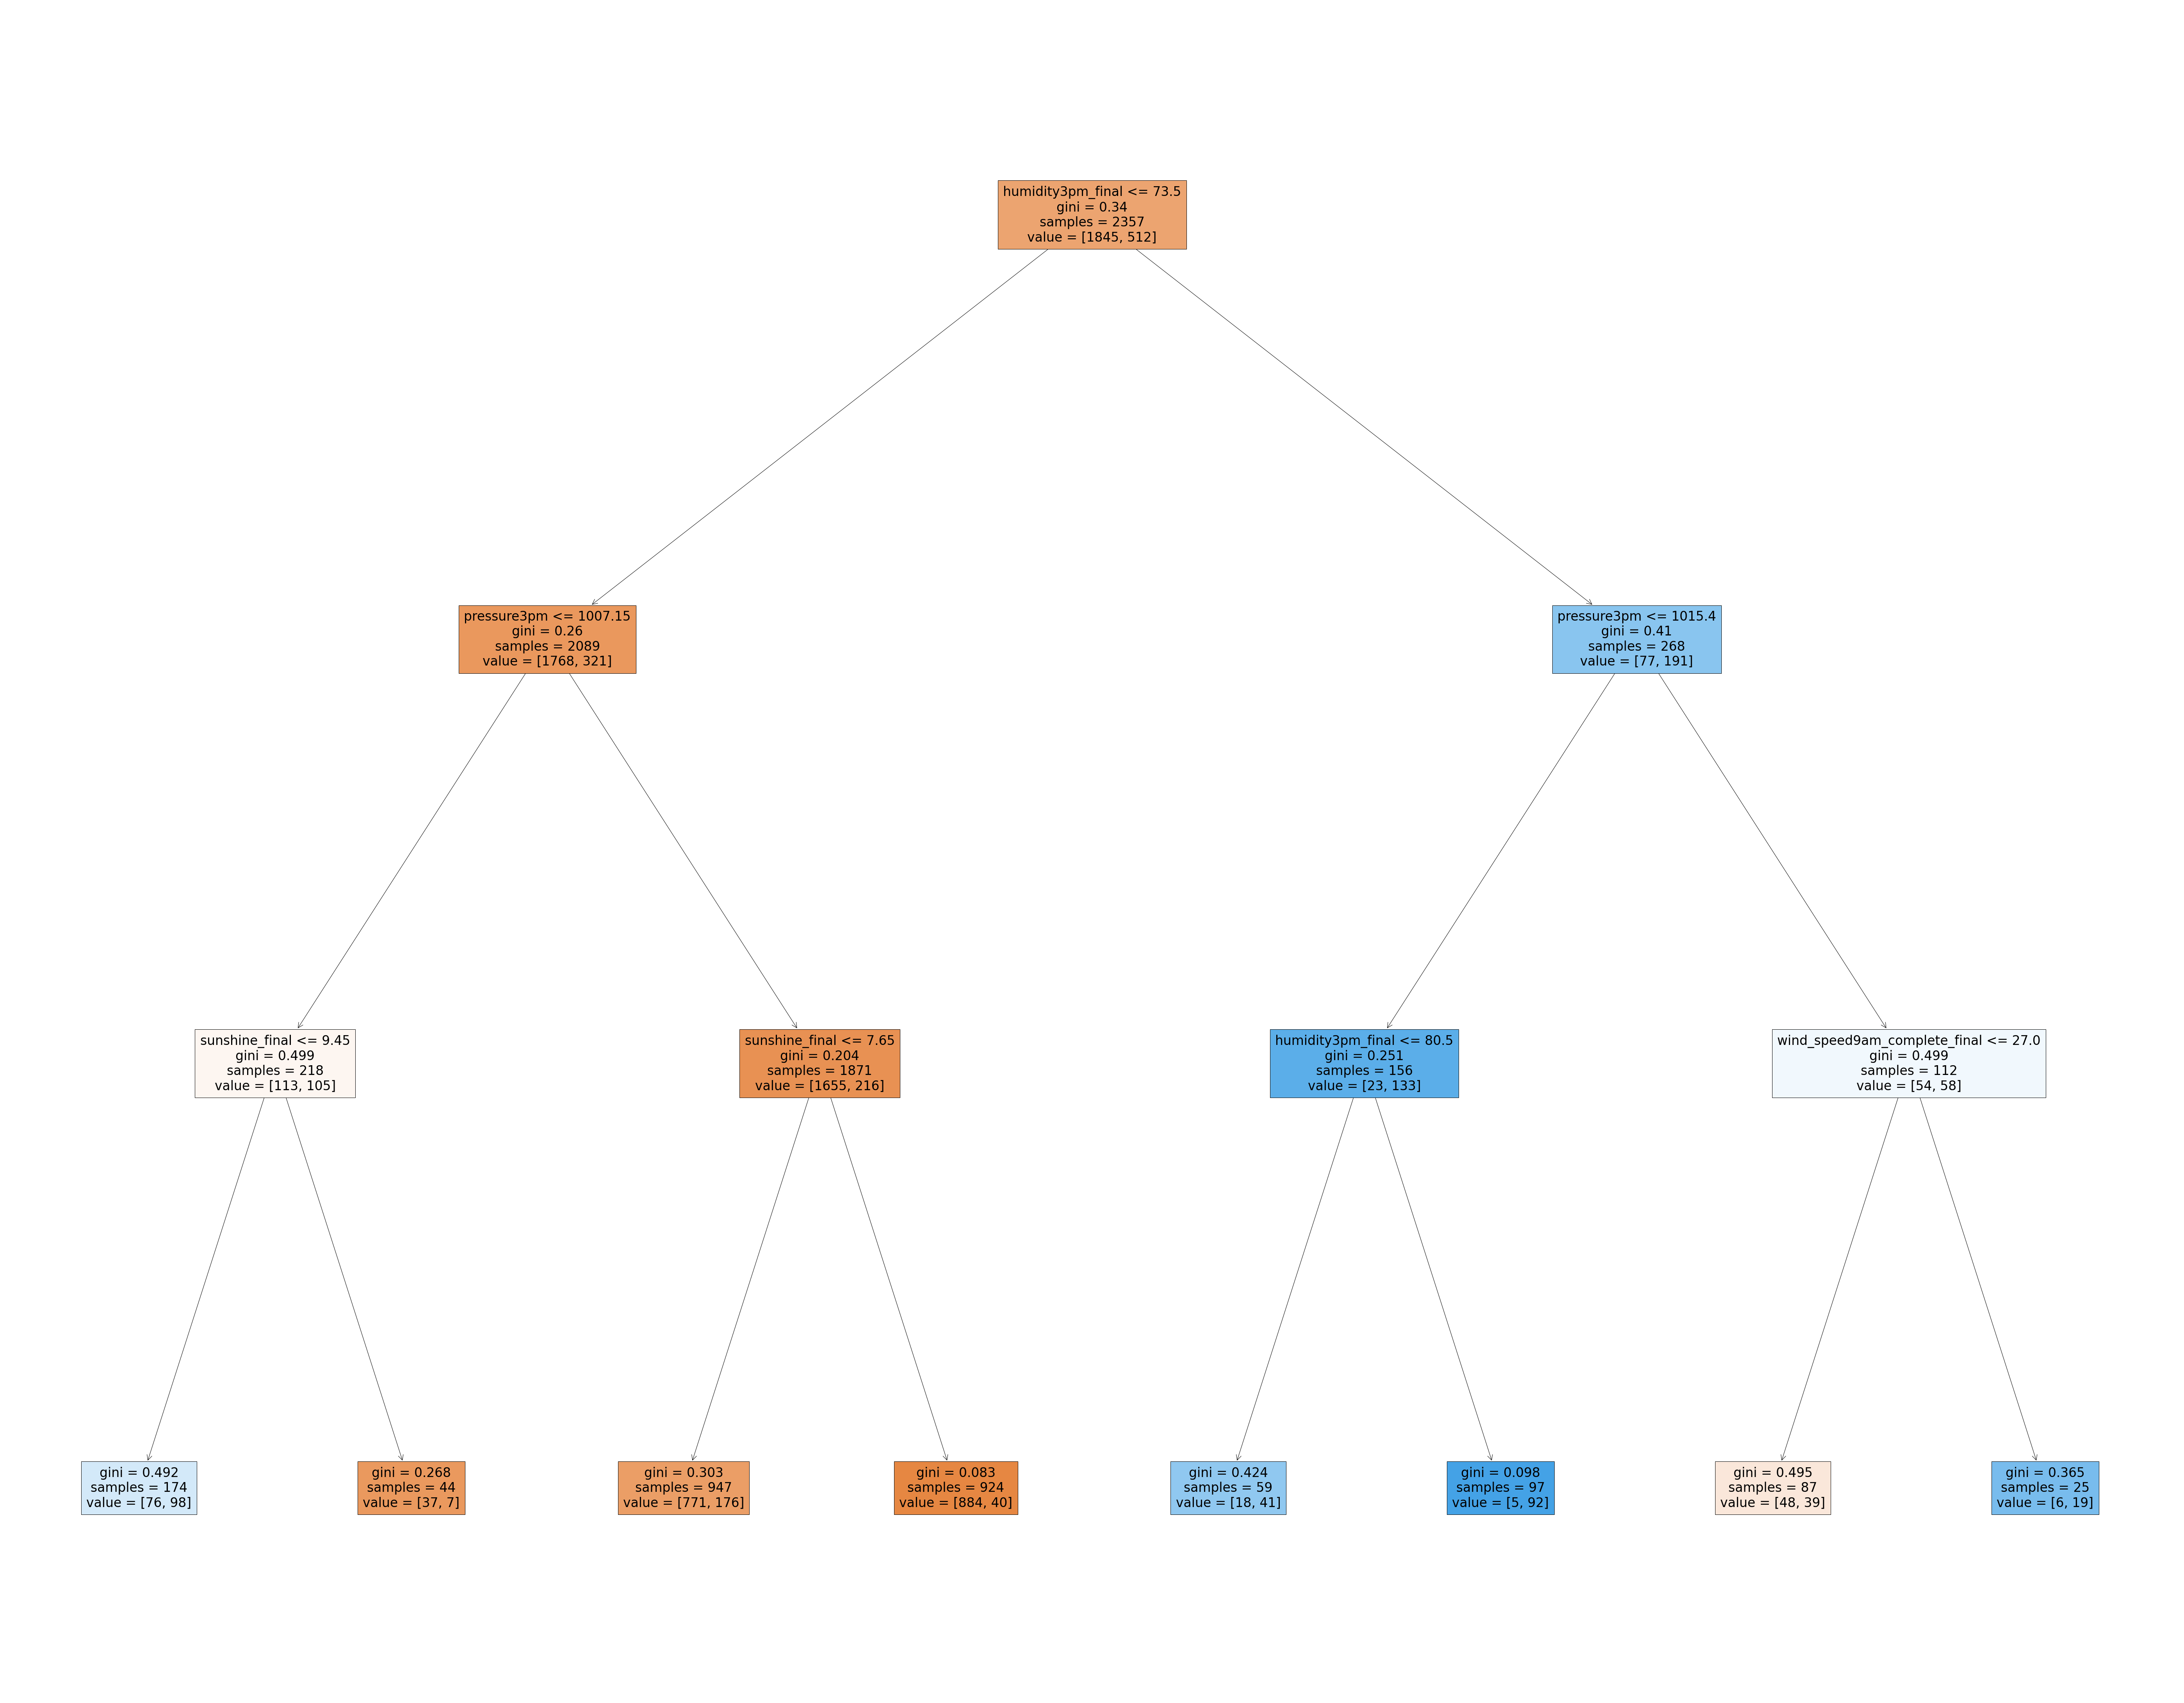

In [53]:
fig, ax = plt.subplots(figsize=(100,80))
plot_tree(decision_tree=tree_baseline, feature_names=X_train.columns, filled=True);

The most influent features are:
- humidity
- wind speed
- sunshine
- evaporation

## Most Influent Features

## Pipeline

To develop the model, the only thing we will do before training the model is the **standardization**, so all variables can be in the same scale and we can use them on the Logistic Regression.

In [39]:
# Create the pipeline for the modeling
modeling = Pipeline(steps=[('scaler', StandardScaler()),
                           ('logistic', LogisticRegression())], verbose=True)

In [40]:
# Train thr model
modeling.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 2) Processing logistic, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())],
         verbose=True)

In [41]:
modeling.score(X=X_train, y=y_train)

0.8330536912751678

In [42]:
modeling.score(X=X_test, y=y_test)

0.830820770519263

In [43]:
precision_score(y_true=y_train, y_pred=modeling.predict(X_train))

0.708185053380783

In [44]:
precision_score(y_true=y_test, y_pred=modeling.predict(X_test))

0.6842105263157895

In [45]:
recall_score(y_true=y_train, y_pred=modeling.predict(X_train))

0.3864077669902913

In [46]:
recall_score(y_true=y_test, y_pred=modeling.predict(X_test))

0.40310077519379844